In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd
import copy
import json
import pickle
from networkFunctions import *
from plotFunctions import *
from populationGraph import populationGraph
from adversarialAgent import adversarialAgent

In [2]:
import chart_studio.plotly as py
import plotly.tools as tls
x = np.arange(0.1,1,0.2)
y = np.arange(0,1,0.2)
mpl_fig = plt.figure()
plt.plot(x,y)
plotly_fig = py.plot_mpl(mpl_fig,filename="janvi")
# py.iplot(plotly_fig)



In [3]:
my_dict = pickle.load(open('pickle_files/vary_type.pkl', 'rb'))
my_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': ['Utilitarian', 'Deontic', 'Virtue', 'Transcendence'],
 'advRatio': 0,
 'outcomeNetwork': {'Utilitarian': <populationGraph.populationGraph at 0x7fdb5009e5e0>,
  'Deontic': <populationGraph.populationGraph at 0x7fdb5070f910>,
  'Virtue': <populationGraph.populationGraph at 0x7fdb507472e0>,
  'Transcendence': <populationGraph.populationGraph at 0x7fdb507874f0>}}

In [4]:
my_dict["outcomeNetwork"]["Transcendence (0.5)"]=my_dict["outcomeNetwork"]["Transcendence"]
del my_dict["outcomeNetwork"]["Transcendence"]

In [5]:
my_dict["outcomeNetwork"].keys()

dict_keys(['Utilitarian', 'Deontic', 'Virtue', 'Transcendence (0.5)'])

In [6]:
# plotNetworkVaryParams(my_dict["outcomeNetwork"],'utility',attr="type",plotType='bar')

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fdb5009e5e0>, 'Deontic': <populationGraph.populationGraph object at 0x7fdb5070f910>, 'Virtue': <populationGraph.populationGraph object at 0x7fdb507472e0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fdb507874f0>}


[93.2, 85.6, 87.8, 92.8]

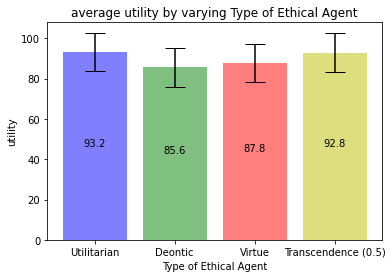

In [7]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'utility',"Type of Ethical Agent",plotType='bar',metric="mean",fig_label="vary_bar/utility")

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fdb5009e5e0>, 'Deontic': <populationGraph.populationGraph object at 0x7fdb5070f910>, 'Virtue': <populationGraph.populationGraph object at 0x7fdb507472e0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fdb507874f0>}


[19.66, 19.28, 19.39, 19.64]

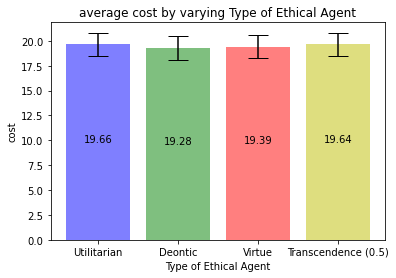

In [8]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'cost',"Type of Ethical Agent",plotType='bar',metric="mean",fig_label="vary_bar/cost")

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fdb5009e5e0>, 'Deontic': <populationGraph.populationGraph object at 0x7fdb5070f910>, 'Virtue': <populationGraph.populationGraph object at 0x7fdb507472e0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fdb507874f0>}


[34, 34, 32, 34]

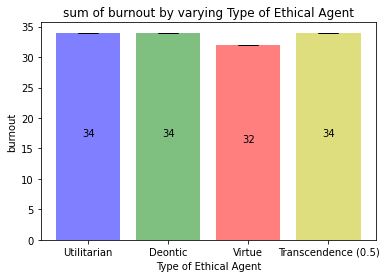

In [9]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'burnout',"Type of Ethical Agent",plotType='bar',fig_label="vary_bar/burnout")

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fdb5009e5e0>, 'Deontic': <populationGraph.populationGraph object at 0x7fdb5070f910>, 'Virtue': <populationGraph.populationGraph object at 0x7fdb507472e0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fdb507874f0>}


[0.9348893557422968, 0.858521465462642, 0.8778037942449707, 0.9303926024955436]

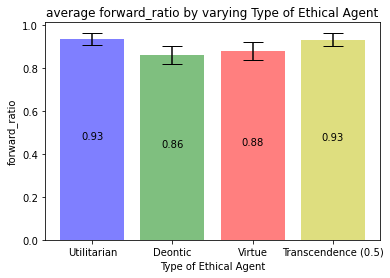

In [10]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'forward_ratio',"Type of Ethical Agent",plotType='bar',metric="mean",fig_label="vary_bar/forwards")

In [11]:
deontic_dict = pickle.load(open('pickle_files/AdvRatio/Deontic.pkl', 'rb'))
util_dict = pickle.load(open('pickle_files/AdvRatio/Utilitarian.pkl', 'rb'))
virtue_dict = pickle.load(open('pickle_files/AdvRatio/Virtue.pkl', 'rb'))
trans_dict = pickle.load(open('pickle_files/AdvRatio/Transcendence(0.5).pkl', 'rb'))
translow_dict = pickle.load(open('pickle_files/AdvRatio/Transcendence(0.1).pkl', 'rb'))
transhigh_dict = pickle.load(open('pickle_files/AdvRatio/Transcendence(1).pkl', 'rb'))
transDict = {0.1:translow_dict["outcomeNetwork"],1:transhigh_dict["outcomeNetwork"]}

In [12]:
trans_dict_quarter = pickle.load(open('pickle_files/AdvRatio/Transcendence(0.25).pkl', 'rb'))
trans_dict_quarter

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 32,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7fdb507ac4c0>,
  0.1: <populationGraph.populationGraph at 0x7fdb329c9d60>,
  0.2: <populationGraph.populationGraph at 0x7fdb32c34820>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7fdb33a94a30>,
  0.4: <populationGraph.populationGraph at 0x7fdb33dfd970>,
  0.5: <populationGraph.populationGraph at 0x7fdb342186a0>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7fdb342858e0>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7fdb342ef0a0>,
  0.8: <populationGraph.populationGraph at 0x7fdb344517c0>,
  0.9: <populationGraph.populationGraph at 0x7fdb344a8a30>}}

In [13]:
# trans_dict_quarter2 = pickle.load(open('pickle_files/AdvRatio/Transcedence(0.75).pkl', 'rb'))
# trans_dict_quarter2

FileNotFoundError: [Errno 2] No such file or directory: 'pickle_files/AdvRatio/Transcedence(0.75).pkl'

In [20]:
outcomeList = { "Utilitarian":util_dict["outcomeNetwork"], "Deontology":deontic_dict["outcomeNetwork"],"Virtue":virtue_dict["outcomeNetwork"],"Transcendence(0.25)":trans_dict_quarter["outcomeNetwork"],
}

Text(0, 0.5, 'Total Cost')

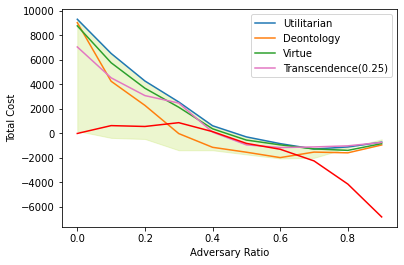

In [21]:
fig, ax = plt.subplots()
color_list = ['tab:blue','tab:orange','tab:green','tab:pink']
count=0
for outcome in outcomeList:
    # print(outcom  e)
    var = outcomeList[outcome]
    y_vals = []
    y_vals_adv = []
    for graph in var:
        # print(var[graph])
        types = list(var[graph].getAgentMapping().values())
        # print(types)
        G = var[graph].getGraph()
        agentDict = {}
        for i in types:
            agentDict[i] = []
        for agents in G:
            agentType = G.nodes[agents]['agent'].getType()
            agentDict[agentType].append(G.nodes[agents]['agent'])
        # print(agentDict)
        for i in agentDict:
            if(len(agentDict[i]) != 0):
                agentDict[i] = np.sum([agent.getProperty('utility') for agent in agentDict[i]])
            else:
                agentDict[i] = 0
        # print(agentDict)
        y_vals.append(agentDict[types[0]])
        y_vals_adv.append(agentDict[types[1]])
    ax.plot(list(outcomeList[outcome].keys()), y_vals,color=color_list[count])
    count+=1
ax.plot(list(outcomeList["Transcendence(0.25)"].keys()), y_vals_adv,color='r')
y_vals_trans = []
for outcome in transDict:
    var = transDict[outcome]
    y_vals = []
    # y_vals_adv = []
    for graph in var:
        types = list(var[graph].getAgentMapping().values())
        G = var[graph].getGraph()
        agentDict = {}
        for i in types:
            agentDict[i] = []
        for agents in G:
            agentType = G.nodes[agents]['agent'].getType()
            agentDict[agentType].append(G.nodes[agents]['agent'])
        for i in agentDict:
            if(len(agentDict[i]) != 0):
                agentDict[i] = np.sum([agent.getProperty('utility') for agent in agentDict[i]])
            else:
                agentDict[i] = 0
        y_vals.append(agentDict[types[0]])
    y_vals_trans.append(y_vals)
        # y_vals_adv.append(agentDict[types[1]])
    # ax.plot(list(outcomeList[outcome].keys()), y_vals)

ax.fill_between(list(transDict[0.1].keys()),y_vals_trans[0],y_vals_trans[1],color='#c3e462',alpha=0.3)
list1 = list(outcomeList.keys())
# list1.append("Adversary") 
ax.legend(list1)
ax.set_xlabel("Adversary Ratio")
ax.set_ylabel("Total Cost")
# fig.savefig("results/adv/burnout.png", dpi=600)




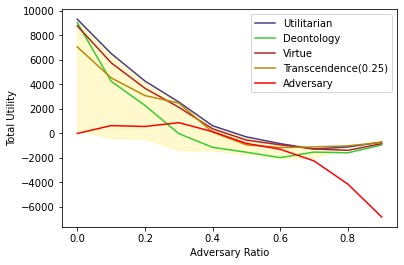

In [22]:
# new_dict = {"Transcendence":trans_dict["outcomeNetwork"]}
advRatio_shadedPlots(outcomeList,transDict,'utility',"Utility",metric = "sum",fig_label="adv/utility")

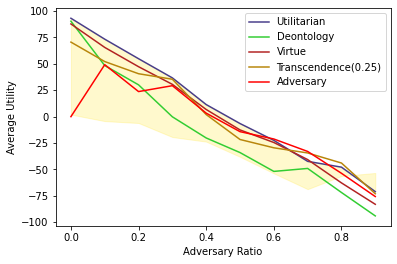

In [23]:
# new_dict = {"Transcendence":trans_dict["outcomeNetwork"]}
advRatio_shadedPlots(outcomeList,transDict,'utility',"Utility",metric = "mean",fig_label="adv/avg_utility")

In [ ]:
advRatio_shadedPlots(outcomeList,transDict,'burnout',"Burnouts",fig_label="adv/burnout")

In [ ]:
advRatio_shadedPlots(outcomeList,transDict,'cost',"Cost",fig_label="adv/cost")

In [ ]:
advRatio_shadedPlots(outcomeList,transDict,'cost',"Cost",metric="mean",fig_label="adv/avg_cost")

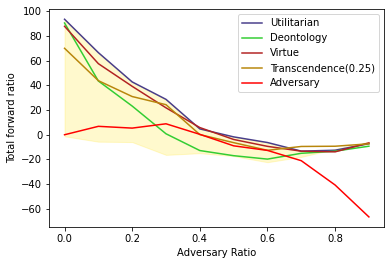

In [24]:
advRatio_shadedPlots(outcomeList,transDict,'forward_ratio',"forward ratio",metric="sum",fig_label="adv/forward")

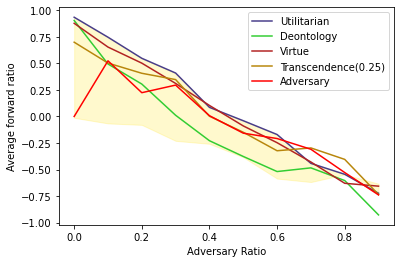

In [25]:
advRatio_shadedPlots(outcomeList,transDict,'forward_ratio',"forward ratio",metric="mean")

In [ ]:
plotComparative(outcomeList,"cost","advRatio")

In [ ]:
plotComparative_shaded(outcomeList,transDict,"cost","advRatio",metric="mean")

In [ ]:
num_msg_dict = pickle.load(open('pickle_files/vary_type_10kmsg', 'rb'))
num_msg_dict

In [ ]:
plotNetworkVaryParams(num_msg_dict["outcomeNetwork"],'utility',"type",plotType='bar')

In [ ]:
gamma_dict = pickle.load(open('pickle_files/vary_gamma.pkl', 'rb'))
gamma_dict

# best_trans = gamma_dict["outcomeNetwork"][1]

In [ ]:
plotNetworkVaryParams(gamma_dict["outcomeNetwork"],'forward_ratio',"gamma",fig_label="vary/forward_ratio/vary_gamma",metric="mean")
# plt.savefig("/results/vary_gamma.png", dpi=600)


In [ ]:
plotNetworkVaryParams(gamma_dict["outcomeNetwork"],'burnout',"gamma")

In [ ]:
fp_dict = pickle.load(open('pickle_files/vary_fp.pkl', 'rb'))
best_deontic = fp_dict["outcomeNetwork"][1]

In [ ]:
# plotNetworkVaryParams(fp_dict["outcomeNetwork"],'utility',"forward probability",fig_label="vary/vary_fp",metric="sum")
plotNetworkVaryParams(fp_dict["outcomeNetwork"],'forward_ratio',"forward probability",fig_label="vary/forward_ratio/vary_fp",metric="mean")

In [ ]:
plotNetworkVaryParams(fp_dict["outcomeNetwork"],'cost',"forward probability",fig_label="vary/vary_fp",metric="sum")

In [ ]:
bin_dict = pickle.load(open('pickle_files/vary_bin.pkl', 'rb'))
bin_dict
# best_virtue = bin_dict["outcomeNetwork"][90]

In [ ]:
# plotNetworkVaryParams(bin_dict["outcomeNetwork"],'utility',"bin size",fig_label="vary/vary_bin",metric="sum")
plotNetworkVaryParams(bin_dict["outcomeNetwork"],'forward_ratio',"bin size",fig_label="vary/forward_ratio/vary_bin",metric="mean")
# plt.savefig("/results/vary_gamma.png", dpi=600)

In [ ]:
plotNetworkVaryParams(bin_dict["outcomeNetwork"],'burnout',"bin size")

In [ ]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'utility')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'utility')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(80,95)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+38,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Utility per agent")
plt.savefig("results/best_bar/utility.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")

In [ ]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'cost')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'cost')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(18.25,20)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+9.5,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Cost per agent")
plt.savefig("results/best_bar/cost.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")

In [ ]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'burnout')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'burnout')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(0.25,0.48)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+0.1,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Burnout per agent")
plt.savefig("results/best_bar/burnout.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")
    

In [14]:
burnout_deontic = pickle.load(open('pickle_files/burnoutThreshold/deontic.pkl', 'rb'))
burnout_util = pickle.load(open('pickle_files/burnoutThreshold/utilitarian.pkl', 'rb'))
burnout_virtue = pickle.load(open('pickle_files/burnoutThreshold/virtue.pkl', 'rb'))
burnout_trans = pickle.load(open('pickle_files/burnoutThreshold/trans(0.35).pkl', 'rb'))
burnout_trans_low = pickle.load(open('pickle_files/burnoutThreshold/trans(0.1).pkl', 'rb'))
burnout_trans_high = pickle.load(open('pickle_files/burnoutThreshold/trans(1).pkl', 'rb'))

In [15]:
burnout_dict = {"Utilitarian":burnout_util["outcomeNetwork"], "Deontology":burnout_deontic["outcomeNetwork"],
  "Virtue":burnout_virtue["outcomeNetwork"],
  "Transcendence(0.4)":burnout_trans["outcomeNetwork"]}
burnout_trans_dict = {0.1:burnout_trans_low["outcomeNetwork"],1:burnout_trans_high["outcomeNetwork"]}

[64.2, 82.0, 91.2, 95.2, 97.2, 97.2, 97.2, 97.2]

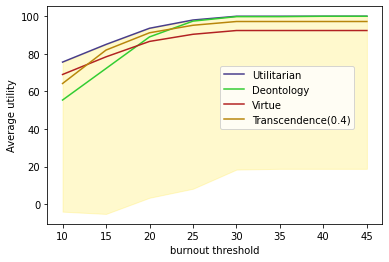

In [16]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"utility","burnout threshold",fig_label="burnout_thresh/utility",metric="mean")

[18.21, 19.1, 19.56, 19.76, 19.86, 19.86, 19.86, 19.86]

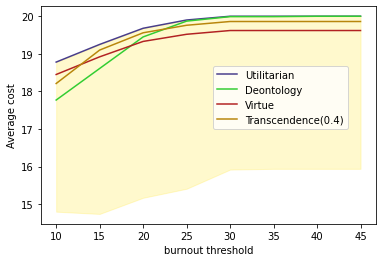

In [17]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"cost","burnout threshold",fig_label="burnout_thresh/cost",metric="mean")

[118, 73, 31, 10, 0, 0, 0, 0]

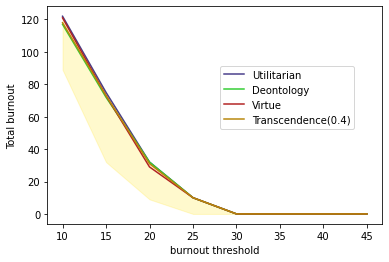

In [18]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"burnout","burnout threshold",fig_label="burnout_thresh/burnout")

[0.6441080088642007,
 0.8084015678164285,
 0.9158210976330171,
 0.9523034290271133,
 0.9725389990126833,
 0.9725389990126833,
 0.9725389990126833,
 0.9725389990126833]

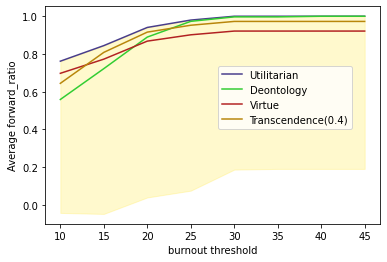

In [19]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"forward_ratio","burnout threshold",fig_label="burnout_thresh/forwards",metric="mean")